# The ring problem


This problem concerns a set of integers that sum to $1$, arranged in a (literal) circular ring.
As such they have a circular order where the last number is adjacent to the first. 
Since the integers of the ring sum to
$1$ there is a distinct possibility one or more of them is negative. 
Define an operation on the ring called a *flip*: Choose a negative number in the ring
that happens to be negative, say it is $a < 0$. Multiply this in place by 
$-1$ so its value is now $-a > 0$. Then add $a$ to the two neighboring
integers. This flip operation is a kind of redistribution of values on
the ring that preserves the sum of the numbers in the ring.
The **problem** is to show that all such rings have a finite number of possible
flips, i.e. eventually no negative numbers will remain in the ring; and thus
no more flips are possible.


### Notation, definitions, observations

- Define a *ring* $R_n$ as $n$ 
integers with sum $1$ arranged in cyclic order. 
The ring consists of *sites* indexed for example
$0, 1, \dots, n-1$ with 
site $n-1$ adjacent to sites $n-2$ and $0$.


> Example ring with $n=8$: 


```
                   3       -7
   site 0:   2                    1    (site 3)
     
   
   site 7:  -10                   8    (site 4) 
    
                    -5       9
```


- Define a *flip* as an operation on R_n: A negative-valued 
site (value $a<0$) is chosen as a flip site; and its value is replaced by $-a$ (positive);
whereupon the two neighboring sites with values
$b$ and $c$ become $b+a$ and $c+a$, 
preserving the sum of all $n$ integers at $1$. 


Example flip: In the ring shown above, site 2 is chosen and becomes +7; whereupon sites 1 and 
3 become -4 and -6 respectively. Sites 6 and 7 are also candidates for 
flipping. 



- Define a ring $Q_n$ with no negative values to be *quiescent*: No flips are possible. 



The problem can now be stated 
$R_n \; _{\overrightarrow{flips}} \; Q_n$.


A quiescent ring $Q$ with sum $1$ necessarily consists of $n-1$ zeros and
a single $1$. Using a fixed indexing scheme there are $n$ possible
quiescent rings $Q_n$.


- Define two ring distances: Sites $a$ and $b$ are separated by distances $s$ and $s'$: 
Clockwise and anticlockwise walks. $s \; + \; s' \; = \; n$. ($s$ and $s'$ are both positive-valued.)


* Define a binary ring as a ring with exactly two non-zero values.


* Observe that a ring with $c$ negative-valued sites has $c$ possible flips where there
is no *a priori* rule for selecting which flip to make. Hence 
$R_n \; _{\overrightarrow{flips}} \; Q_n$ 
must be true for any flip sequence.

## Spoilers ahead!


# Part 1: Entropy


## Spade work


* This problem is related in spirit to the 
[**Collatz conjecture**](https://en.wikipedia.org/wiki/Collatz_conjecture): 
Repeated application of a simple rule to a numerical state 
with the question being the inevitability of an end state. 
The ring problem is perhaps simpler as there is only one available
operation, the flip; whereas the Collatz process has a built-in `if-else`.


* Calculation for a few example rings turns up
no obvious counter-examples.


    * Such a counter-example might be a sequence of flips leading from $R_n$ back to $R_n$.


* The description of a *flip* suggests $n > 2$. However $n = 2$ and $n = 1$ 
are also trivially permissible. 


* $R_n$ includes at least one positive number. We can choose to reverse the flip process
to generate direct 'parent rings' of $R_n$. A ring with 
$p$ positive values can produce $p$ parent rings. 


* One can imagine a metric $E(R_n)$ useful in solving the 'quiescence' problem.
An ideal metric would be integer-valued, bounded below, and strictly monotonic
with flip operations.



* The clockwise and anti-clockwise distances between two
sites were written above as $s$ and $n-s$, positive valued. Define a signed distance as the product of clockwise and anti-clockwise distances, 
$D(n, s) = s \cdot (s-n) = s^2 - ns < 0$.  


* $D(n, s)$ is always negative and has its minimal value when two sites are 
at opposite locations about the ring.


* Owing to the 'sum of all $n$ numbers in $R_n$ is one' requirement it is impossible to configure numbers in 
$R$ to give symmetry under rotation.



* Suppose that the premise of the problem is correct, that all $R_n \rightarrow Q_n$ with
repeated flip operations. 
    * Define the number of flips in such a progression as the **flip count** $f_c$.
    * Define the sum of additions to (negative-valued) flip sites as the **flip sum** $f_s$. If for
example a ring $R$ has a site with value $-3$ and this is flipped: The flip sum
increases by $6$.

## Assertions without proof


### Empirical patterns


* Each $R_n$ converges to a unique $Q_n$ and $f_c$ is fixed: No choice of flip sites 
will change the ultimate flip count from $R$ to $Q$.

* For a given $n$ the space of possible ring 
configurations can be described as a directed 
graph $G$ (a 'ring flip graph') in which each $R_n$ appears once as a vertex. The edges of the 
graph are flip operations. The graph can be viewed as a series of
(indexed) vertex layers. The vertices in a layer connect to vertices in the layer 
below via flips; to vertices in the layer above by inverse-flips. 
Layer $0$ of this graph has one vertex, $Q$. (Here I am ignoring the 
trivial rotation of indices.) 
The layer index $m$ of ring $R$ is its flip count $f_c$.

- All ring configurations in a given layer of $G$ have the same flip count. 
However these rings do not have the same flip sum $f_s$. 

- Definition: "indexing independence": 
    - The directed graph for *all* $R_n$ consists of $n$ independent, identical graphs: One for each choice of 
site indices. Let's refer to these identical graphs as convergence graphs $C_{n, i}$ where $i \in [0, n-1]$ is the $1$-site in $Q_n$. 
    - We move through one convergence graph from $R_n$ to $Q_n$ by means of flips; or in the opposite direction with inverse flips. 
    - We never transflate via flips or inverse flips into one of the other $n-1$ convergence graphs.

* $R \rightarrow Q$ requires some number of flips $f_c$, 
called the flip count. This is determined by $R_n$
and is the fixed 
irrespective of flip site choices, as noted above in the graph comment.

- A flip sum $f_s$ is the sum of the positive additions of all
flip operations in $R \rightarrow Q$. 
For example, flipping -3 to 3 adds 6 to $f_s$. 
Just as $f_c$ is fixed for any sequence of flips $R_n \rightarrow Q_n$ 
so $f_s$ is fixed for $R_n$.


### Entropy defined


- A ring $R_n$ has $n$ sites with *values* denoted $\; a_0, \; a_1, \; \dots, \; a_{n-1}$. 
These sum to $1$.Define the *entropy* of $R_n$ as a sum over all site pairs $i$ and $j$ of 
the product $D(i, j) \cdot a_i \cdot a_j$.



$$E = \mathop{\sum^{n-2}\;\sum^{n-1}}_{i = 0\  \;\;\ j > i}{\;\;a_i \cdot a_j \cdot s \cdot (s-n)}$$


or equivalently


$$E = \sum_{i=0}^{n-2} \sum_{j=i+1}^{n-1}{a_i \cdot a_j \cdot (j-i) \cdot (j-i-n)}$$



- $E$ will prove to be equal to the flip sum $f_s$: In $R_n \rightarrow Q_n$,
the positive sum of flip values between present state and quiescence.

- $E$ will prove to be an even number.

- $f_s$ is
independent of flip choice(s). Number of flips $f_c$ is also independent of flip choice(s).

- Given a choice of flip sites (multiple negative-valued sites): The change in entropy varies with choice.

- $E$ is integer-valued and decreases strictly monotonically with flips. 

- Any $R_n$ can be reached through a sequence of 
inverse flips applied to an appropriate $Q_n$.
Inverse flips from $Q_n$
build the set of all possible $R_n$ rings. 

- Suppose $m$ inverse flips are applied to some $Q_n$. Taking all possible choices of inverse flip
generates 
the set $C_{n, m}$ of all possible $R_n$ that are $m$ flips from $Q$.

- Reminder: Any rotation of indices for some $R_n \; \in \; C_{n, m}$ simply moves this ring to one of
the other convergence graphs, meaning it will resolve to another $Q_n$ with indices rotated likewise.

- Two rings may have the same entropy $E$ but have distinct flip counts $f_c$.
    
    

### Python analysis


The cell directly below this one loads some useful libraries including a module
with these utility functions.


```
import random as rand
import randint, choice

R_n_zero(n, x):    return a zero-sum ring
R_n(n, x):         one-sum ring, mostly on [-x, x]
kJustify(k, n):    make sure an index is on 0...n-1
kDec(k, n):        decrement index k
kInc(k, n):        increment
Distance(a, b, n): shortest distance from a to b (positive)
NegList(R):        how many neg-valued sites + list of their indices
PosList(R):        " + "
Flip(R, a):        a = index; returns R and +v; ERROR! should return 2v
IsQuiescent(R):    bool
Entropy(R):        int value
Entropy2(R):       some decomposition of entropy...???...
RQ(R):             returns fc and fs in R -> Q

```

In [1]:
import random as rand, numpy as np, matplotlib.pyplot as plt, sys
from ringmodule import *

## R -> Q

The following cell runs a number of trials: Generate R by some random means, 
make flips, arrive at Q; and report the outcome. 


In [2]:
print('Here is a diagnostic look at multiple R -> Q trials...\n')

entropy   =  500       # a target entropy for a trial ring
n         =    7       # number of sites on this ring
v         =    5       # most ring site values will be on [-v, v]

n_trials, nCutoff = 20, 50000
halt_flag, fc_trials, fs_trials, Emax, attempts_sum = False, [], [], 0, 0

for trials in range(n_trials):
    E = -1  
    nAttempts = 0 
    while E != entropy:                                      # starts out True: Keep doing this until E == entropy_control
        nAttempts += 1                                     
        if nAttempts > nCutoff:                              # failsafe for entropy not matching entropy_control
            halt_flag = True
            break
        R = R_n(n, v)                                        # generate a ring...
        E = Entropy(R)                                       # ...and note its entropy in E
        if E > Emax: Emax = E
    
    if halt_flag: break                                      # quit trying, fall through to diagnostics
    if not trials: R_example = R[:]
    attempts_sum += nAttempts
    fc, fs = RQ(R)
    fc_trials.append(fc)                                     # maintain the lists of flip counts and flip sums
    fs_trials.append(fs)

if halt_flag:
    print('entropy never equalled desired control value; max', Emax)
else:
    print('example R:', R_example)
    print('entropy of this ring:', Entropy(R_example))
    print('target entropy', entropy)
    print('number of sites:', n)
    print('limit for n-1 sites absolute value:', v)
    print('mean value of the flip count:', sum(fc_trials)/len(fc_trials))
    print('standard deviation:', np.std(fc_trials))
    print('number of distinct flip count outcomes:', len(set(fc_trials)))
    print('   Here they are:', sorted(set(fc_trials)))
    print('average random Rs per trial (needed to hit target entropy):', attempts_sum / n_trials)
    print('the E maximum was', Emax)
    print('Is flip sum == entropy? Well, here are all the flip sums:')
    print(fs_trials)

Here is a diagnostic look at multiple R -> Q trials...

example R: [3, 1, 4, -5, 4, 4, -10]
entropy of this ring: 500
target entropy 500
number of sites: 7
limit for n-1 sites absolute value: 5
mean value of the flip count: 76.55
standard deviation: 1.4654350889752845
number of distinct flip count outcomes: 7
   Here they are: [73, 74, 75, 76, 77, 78, 79]
average random Rs per trial (needed to hit target entropy): 446.65
the E maximum was 3640
Is flip sum == entropy? Well, here are all the flip sums:
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


### How the above code works


#### Control parameters


There are three control values in the above code excluding the number of trials `n_trials`.


The first control value is a starting point of entropy '`entropy`' for a ring.  

This ring has some number of sites $n$, in code the parameter `n`. 


The ring is generated randomly using a site value constraint, parameter `v`.


#### Randomized ring generation

Assign all but one of the ring sites a random value on the interval 
`[-v, v]`. Sum these $n-1$ values to $S$ and set the final site to
value $1-S$ to ensure the total sum is $1$.  
 

### Experimenting, observations, questions


* Are some entropy values or flip counts forbidden?
    * Some entropies are easier to reach than others
    * Some flip counts seem to be excluded
        * R{ n = 4, v = 5, E = 240 } can have $f_c$ 30 and 32 but not 31
* Flip count $f_c$ increases with increasing $n$
    * ...suggests a histogram
* Flip sum $f_s$ equals entropy $E$


In [3]:
def QRStats(n, v, E_target, nt, nq):
    '''
    do a number of trials on random R given a set of control parameters
      n, v, E_target controls the ring build
      nt, nq are how many rings to generate and the failsafe
    Returns a list of flip counts and the max entropy from random generation
    '''
    fc_trials, Em_trials = [], []
    for trials in range(nt):
        E, tries, Emax = -1, 0, 0
        while E != E_target:
            tries += 1                                     
            if tries > nq: 
                print(E_target, 'gets uh oh 1: no luck generating')
                return [], []
            R = R_n(n, v)                           # generate a ring...
            E = Entropy(R)                          # ...and note its entropy in E 
            if E > Emax: Emax = E
        fc, fs = RQ(R)
        if not fs == E_target: 
            print('uh oh 2')
            return [], []
        fc_trials.append(fc)                        # maintain the lists of flip counts and flip sums
        Em_trials.append(Emax)
    return fc_trials, Em_trials

go_fast = True

if not go_fast:
    for E_trial in range(250, 267, 2):
        n = 8
        v = 5
        fc, E = QRStats(n, v, E_trial, 1000, 20000)
        if len(E): print(E_trial, '(', n, v,')', sorted(set(fc)), ' --- ', max(E))
else:
    print('Change go_fast to False to engage this analysis')

Change go_fast to False to engage this analysis


The above run indicates only even entropies exist; and that for a range of entropies
we see a corresponding fairly constrained set of flip counts. This suggeests generating 
a lot of random rings to accumulate histograms of E and fc. So let's do that next.


Some diagnostics from the maximal entropy and flip count cases:

Biggest entropy for this n, v = 4970
Corresponding ring = [5, -5, 4, 2, -5, -5, 5]
The entropy of that ring = 542
The flipsum = 542

Biggest flip count = 274
Corresponding ring = [5, -5, 4, 2, -5, -5, 5]
The entropy of that ring = 542
The flipsum = 542



[(0.0, 3500.0)]

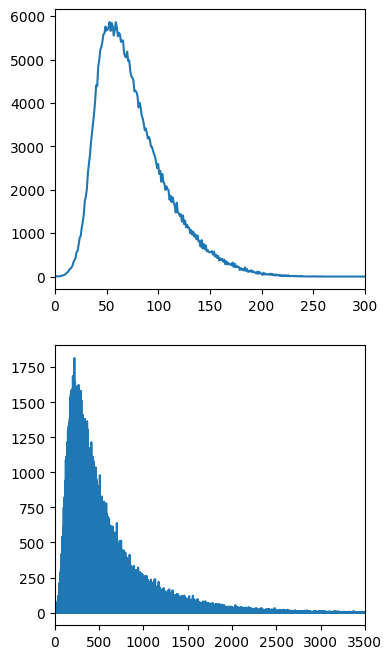

In [9]:
nRings = 400000
maxE   =  6000
maxFc  =   300

n = 7
v = 5
E, fc = [0]*maxE, [0]*maxE
biggestE = 0
biggestfc = 0
for i in range(nRings):
    R = R_n(n, v)
    this_fc, this_E = RQ(R_n(n, v))
    if this_E > biggestE: 
        biggestE   = this_E
        RbiggestE  = R[:]
    if this_fc > biggestfc:
        biggestfc  = this_fc
        Rbiggestfc = R[:]
    fc[this_fc] += 1
    E[this_E] += 1

print()
print('Some diagnostics from the maximal entropy and flip count cases:')
print()
print('Biggest entropy for this n, v =', biggestE)
print('Corresponding ring =', RbiggestE)
print('The entropy of that ring =', Entropy(RbiggestE))
print('The flipsum =', RQ(RbiggestE)[1])
print()
print('Biggest flip count =', biggestfc)
print('Corresponding ring =', Rbiggestfc)
print('The entropy of that ring =', Entropy(Rbiggestfc))
print('The flipsum =', RQ(Rbiggestfc)[1])
print()

fig, ax = plt.subplots(2,1,figsize=(4,8))
ax[0].plot(fc)
ax[0].set(xlim=(0,300))
ax[1].plot(E)
ax[1].set(xlim=(0,3500))

It would be interesting to see a 2D characterization of maximal
entropy as a function of n and v.

In [ ]:
nLo, nHi = 3, 12
vLo, vHi = 2, 10
for n in range(nLo, nHi + 1):
    for v in range(vLo, vHi + 1):
        trials = function of n and v...
        Emax   = 0
        fc_max = 0
        for t in range(trials):
            R     = R_n(n, v)
            fc, E = QR(R)
            


It would be interesting to generate
some zero-sum rings and investigate two things: 
    - Do they also become quiescent?
        - By extension does any ring sum, positive or negative, become quiescent?
    - What is delta entropy when 1 is added to each site of a zero-sum ring?

In [ ]:
# R_n_zero(n, x):    return a zero-sum ring
# Q(R):              bool (relaxed version of Q: all non-negative) 

R = R_n_zero(12, 7)

now need to make RQ() depend on Q() rather than on IsQuiescent()

# Part 2: Binary rings


A *binary* ring $B_n$ begins with all sites zero but two: 
One $b$ and one $1-b$, with $b > 1$.
Distances between them are $s$ and $n-s$ so 
$n$, $b$, and $s$ describe the binary ring completely.


Example: Suppose $B_{n=9}$ has values 
$0,\;4,\;0,\;0,\;0,\;0,\;0,\;0,\;-3$ so $b\;=\;4$ and $s\;=\;2$.


Towards $f_c(n, b, s)$: The table below for $b=2$.
Rows: increasing $n$.
Columns: increasing separation $s$ with corresponding entropy $E$.



```
 n     s   E          s   E         s   E         s   E  
 5     1   8          2  12
 6     1   10         2  16         3  18
 7     1   12         2  20         3  24
 8     1   14         2  24         3  30         4  32  
```

The pattern continues, consistent with an $E$-formula 
as the product of two $S$ and $T$: $E=T(b)\times\;S(n, \; s)$.


$T(b) = b \cdot (1-b) = b - b^2$ and
$S(n, \; s) = s \cdot (s-n)$ gives the values of $E$ in the table above.
Extending this to a sum over all site pairs results in the full
entropy formula for any ring.


A binary $n$-ring with values $b$ and $1-b$ separated by $s$
has a an entropy $E = (b^2 - b) \times \; s \; \times \; (n-s)$.


Next: A formula for $f_c$ the flip count for a binary ring for
$B \rightarrow Q$. Here is a table of $E$ and $f_c$ values for fixed $n\;=\;12$.


```
n = 12

            s = 1       s = 2       s = 3       s = 4       s = 5       s = 6
            E  fc       E  fc       E  fc       E  fc       E  fc       E  fc
b = 2:     22  11      40  20      54  27      64  32      70  35      72  36 
b = 3:     66  22     120  40     162  54     192  64     210  70     216  72
b = 4:    132  33     240  60     324  81     384  96     420 105     432 108
b = 5:    220  54     400  80     540 108     640 128     700 140     720 144
```

Here, by row, we see that the factors to obtain $f_c$ from $E$ are 1/2, 1/3, 1/4 and 1/5
for b = 2, 3, 4, and 5 respectively. This suggests $f_c \; = \; \frac{E}{b}$. 
Now for $B$:

$E = f_s = (b-b^2)\;(s)\;(s-n)$


$f_c \; = \; \frac{E}{b} \; = \; (1-b)\;(s)\;(s-n)$


This expression for $f_c$ is not immediately translatable to a general formula the same
way $E$ was. 

The next code recurses through all possible forward paths from $R$ to $Q$.
    

The third Python program begins from some $Q_n$ and uses reverse-flips to generate the 
complete directed graph to some depth. 
This gives the number of configurations at a *depth* distance (number of 
flips) from $Q$ which of course depends upon $n$. 


## Metrics


A metric produces a number from the ring state; like a "score". 
For example one might sum the squares of all the numbers in the ring.  


Finding a good metric $M$ proved difficult. My guesses for metric functions 
tended to be noisy, though also trend-wise convergent. A metric that 
is not strictly monotonic is less straightforward than one that is.


## Variant idea


A negative
value could be chosen from the ring and some double increment added to it, say $2e$ whereupon $e$ 
would then be subtracted
from both neighbors to keep the sum constant. Even more generally: $e$ (finite positive)
might vary from one move to another. I thought about this as a possible means of making the 
problem easier to solve but it did not help.


## Further notes


* RK makes the point that $F$ is a discrete $\nabla^2$
* Thinking of the ring as hills and holes suggests questions on dispersion, 
for example 
'How far around the ring must I traverse from some negative site to 
find a compensatory positive balance?' 
* An interesting thing happens (resembling a CA) when only one negative 
value remains in $R_n$.
Suppose for example the ring is as shown below where $n\;=\;20$. 
There is only one number available to flip: producing a shifted 7  -7 pair;
and then again to shift another step and so on: A traveling wave 
that propagates to the right around the ring. As the numerical values 
found in the ring do not change during propagation this suggests that
any metric (if it is to be monotonic) should somehow incorporate a type of 'ring distance'. 

```
 0  0  0  0  0  0  0  1  7 -7  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  7 -7  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  7 -7  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  7 -7
-7  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  7
 7 -7  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  7 -7  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  7 -7  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  7 -6  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  6 -6  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  6 -6  0  0  0  0  0  0  0  0  0  0
```
    
Notice that the above sequence with the propagating $7, \;-7$ pair is never symmetric
under rotation about the $1$. As a cryptic remark: This means that a distance-based
metric will not necessarily hit a local minimum during this propagation. 

After establishing the utility code (above) we proceed to some testing of flips applied to rings.

- `sourceA` is a list of binaary test rings, running n = 5 to 12
- `sourceB` is a list of n = 12 binary test rings; v runs 2 through 5

In [7]:
# for each ring in source[] determine how it resolves
# source = [[3,7,2,9,-14,4,-3,-3,-4]]
for i in range(len(sourceB)):
    R = sourceB[i][:]
    E = Entropy(R)
    fc, fs = RQ(R)
    print('n', len(R), 'fc', fc, 'E', fs, sourceB[i][:])
    if not E == fs: print('             entropy error found:', i, fs, E)

n 12 fc 11 E 22 [-1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 20 E 40 [-1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 27 E 54 [-1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 32 E 64 [-1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 35 E 70 [-1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
n 12 fc 36 E 72 [-1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
n 12 fc 22 E 66 [-2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 40 E 120 [-2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 54 E 162 [-2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 64 E 192 [-2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 70 E 210 [-2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
n 12 fc 72 E 216 [-2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
n 12 fc 33 E 132 [-3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 60 E 240 [-3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 81 E 324 [-3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 96 E 384 [-3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
n 12 fc 105 E 420 [-3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
n 12 fc 108 E 432 [-3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
n 12 fc 44 E 22

In [8]:
# p = [4, 12, -4, 7, 6, -12, -7, -5, 14, -14]
p = [4, 0, 1, -3, -2, 1]
R=p[:]
fc, fs = RQ(p)
print('ring of length', len(p), ':', R, 'has entropy:', fs, '; flip count:', fc)


# fig, ax = plt.subplots(2, figsize=(12,12))


ring of length 6 : [4, 0, 1, -3, -2, 1] has entropy: 146 ; flip count: 33


In [10]:
# a recursive approach to explore all choices of flip location in parallel
# a path is a linked sequence of rings
# This begins to explore the graph of paths leading to a single quiescent state
# 
# What to do next here:
#   - probably review all the variables
#   - add a degenerate[] counter that matches up with the pHistory[] list
#     - this would count the number of times this configuration was arrived at
#     - and then together with Depth[] we have a view of the graph generated from initial p[] to quiescent[]
#     - also needed is a histogram of configs across the depths: how many zeros, how many ones, ... 
#     - also needed (See remarks after) is a way of seeing the number of flips at each location on the ring
#       - does this distribution change for different paths from P[0] to Q?

import random as r
import numpy as np
import matplotlib.pyplot as plt

# to copy a list p to another (separate memory) list q use: q[:] = p[:]

# iterative function to try the next negation
# passed both a depth and a ring p[]
# get the list of negative locations and...
#   if we are done: return
#   else loop over each such location: flip each one into a new q[] and call recursive_flip(q)

def recursive_flip(depth, p):
    
    global maxDepth
    global nDegenerate
    global nHistoryDepthMismatches
    global nFlips
    global pHistory, pDepth, pDegeneracy
    
    # print(p)
    
    if depth > maxDepth: maxDepth = depth

    if p not in pHistory:
        pHistory.append(p)
        pDepth.append(depth)
        pDegeneracy.append(1)
    else: print('logic failure: This p should not be in pHistory but it is...')
        
    nNeg, nlocs = NegList(p)
    
    if nNeg == 0 and p not in quiescent: quiescent.append(p)
            
    for j in range(nNeg):                             # transit through all negative-valued locations in p (j)
        q=p[:]                                        #   make a copy of p as q
        flipperwalt = -q[nlocs[j]]                    #   do the flip at location j in q
        q[nlocs[j]] = flipperwalt                     #  
        q[kJustify(nlocs[j]-1, n)] -= flipperwalt     #  
        q[kJustify(nlocs[j]+1, n)] -= flipperwalt     #   ...so now q with one flip is actually at (depth+1)
        if q in pHistory:                             # has q already been found? (i.e. is it degenerate?)
            nDegenerate += 1                          #   count these
            hIndex = pHistory.index(q)                #   the history index where this degeneracy was found is hIndex
            pDegeneracy[hIndex] += 1                  #     ...which we can use to track the degeneracy count
            if depth + 1 != pDepth[hIndex]:           #   if the depth of the degeneracy is *different*... 
                nHistoryDepthMismatches += 1          #     track this as a depth mismatch
                print('history depth mismatch:',  \
                  depth, hIndex,                  \
                  pDepth[hIndex],                 \
                  pHistory[hIndex], q)
                
        else:
            nFlips += 1
            recursive_flip(depth+1, q)              # as q is new: recurse on q
            
    return
        

xtreme = 8
n = 6
p = R_n(n, xtreme)
# large: p = [6, -6, -6, 3, 6, -2]
# p = [-7, 8, -7, 6, -7, 8]

sumsquares = 0
for i in range(len(p)): sumsquares += p[i]**2

maxDepth = -1
pHistory, pDepth, pDegeneracy = [], [], []
# These are...
#   a list of p-lists which align with pDepth[]: All the p's we have found
#   a corresponding list of depths from the start position where each p was encountered
#   a list of how many times this ring was arrived at via a flip

quiescent = []            # a list of p-states that contain no negatives
histogram = []
nDegenerate = 0
nHistoryDepthMismatches = 0
nFlips = 0
print(p)
recursive_flip(0, p)

if len(quiescent) > 1: print('there were', len(quiescent), 'quiescent states')
else: print('quiescent:', quiescent[0])
print('history depth-mismatches = ', nHistoryDepthMismatches)
print('there were', nDegenerate, 'degeneracies: a ring produced by different paths')
print('max depth is', maxDepth)
print('there are', len(pHistory), 'configurations generated')
print('sum of squares to configs ratio is', sumsquares/float(len(pHistory)))
print('maximum degeneracy value was', max(pDegeneracy))

[0, -3, 7, -1, 2, -4]
quiescent: [0, 0, 1, 0, 0, 0]
history depth-mismatches =  0
there were 1999 degeneracies: a ring produced by different paths
max depth is 44
there are 1490 configurations generated
sum of squares to configs ratio is 0.053020134228187916
maximum degeneracy value was 4


#### Remarks on the second program

The program supports a conjecture: Choice of which negative to flip is immaterial to the total
number of flips needed to arrive at $Q$. From $R$ the tree expands to some maximum breadth at 
some depth and this collapses eventually to smaller configuration sets.

One idea is to try and regard some $R$ as a superposition of 
numbers that are immutable; for example stacks of ones and negative
ones that are shuffled to cancel leaving a single 1 remainder in $Q$.
This suggests labeling and tracking their progression in flips.


Another idea is to look for commonality in different parents of a degenerate $R$. 


Finally a histogram of flip locations might be interesting. If the number of flips is fixed
in going from $R$ to $Q$: What about the distribution of those flips about the ring? 



In [11]:
# Third program: Exhaustive reverse search from quiescent to R
# Recursive as with the Second program above; reverse flips expanding out to some fixed flip depth

import random as r
import numpy as np
import matplotlib.pyplot as plt

# iterative function to try a next reverse-flip
# number depth in the reverse-flip direction and treeDepth to constrains how far we go
# start by receiving a ring state p[]
#   already found? return
#   else: 
#     get the list of positive locations
#     loop over each location: 
#       Copy p[] to q[]
#       reverse-flip the next site on q[] 
#       call reverse_flip(q)

def reverse_flip(depth, p, flipSum):
    
    global treeDepth
    global nDegenerates
    
    if p in pHistory:
        pIndex = pHistory.index(p)
        pDegeneracy[pIndex] += 1
        nDegenerates += 1
        return
    
    n = len(p)
    pHistory.append(p)                       # list of p[] lists
    pDepth.append(depth)                     # corresponding depth of this p[] 
    pFlipSum.append(flipSum)
    pDegeneracy.append(1)
    
    nPos, plocs = PosList(p)
    
    if depth >= treeDepth: return

    # to reach here means we plan to go to the next depth for all positive sites in p[]
    for j in range(nPos):        
        q=p[:]
        reverse_flipperwalt = q[plocs[j]]     # a positive number (we are going backwards!)
        q[plocs[j]] = -reverse_flipperwalt    # the reverse-flip to the negative
        q[kJustify(plocs[j]-1, n)] += reverse_flipperwalt
        q[kJustify(plocs[j]+1, n)] += reverse_flipperwalt
        reverse_flip(depth + 1, q, flipSum + reverse_flipperwalt)

    return

treeDepth, nDegenerates = 2, 0
ncells_start = 7
ncells_end = ncells_start + 1
p, pHistory, pDepth, pFlipSum, pDegeneracy = [], [], [], [], []

for n in range(ncells_start, ncells_end):
    p, pHistory, pDepth, pFlipSum, pDegeneracy = [], [], [], [], []
    p.append(1)
    for i in range(1, n): p.append(0)

    nDegenerates = 0            # this is an across-the-tree number of re-arrivals
    reverse_flip(0, p, 0)       # will populate pHistory, pDepth, pFlipSum which are unsorted
    b=[]                        # ok b is an empty list
    for i in range(treeDepth+1): b.append(0)            # now b is a bunch of zeroes
    for i in range(len(pHistory)): b[pDepth[i]]+=1      # now b is a histogram of how many p's existed at each depth
    print(n, 'sites;', nDegenerates, 'total degeneracy to depth', treeDepth, 'where quiescent has depth 0')
    print('histogram of p-count with depth:\n', b)                           # and there is your readout
    for j in range(treeDepth+1):
        for k in range(len(pHistory)):
            if pDepth[k] == j:
                myFSG = Entropy(pHistory[k])
                append_text = '!!!!!!!' if myFSG == pFlipSum[k] else ''
                print('  '*j, pDegeneracy[k], pFlipSum[k], myFSG, pHistory[k], append_text)


7 sites; 0 total degeneracy to depth 2 where quiescent has depth 0
histogram of p-count with depth:
 [1, 1, 2]
 1 0 0 [1, 0, 0, 0, 0, 0, 0] !!!!!!!
   1 1 2 [-1, 1, 0, 0, 0, 0, 1] 
     1 2 4 [0, -1, 1, 0, 0, 0, 1] 
     1 2 4 [0, 1, 0, 0, 0, 1, -1] 


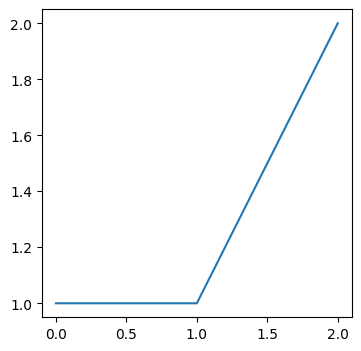

In [13]:
# The list b[] is how many configrations of the ring exist at depth = number of (inverse) flips
fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(range(treeDepth+1), b)

## Progress


Early metrics I tried were not reliably monotonic although they did tend to decrease to a minimum.
This led to experimenting with binary rings, and that in turn led to the entropy metric.


This led to exhaustive recursive searches both forward and backward.
These experiments made it clear that an initial ring occupies a vertex in the rigid directed 
graph of all rings of size $n$. This di-graph has multiple paths to a particular ring. 
In the flip directed graph the number of edges departing some $R$ equals the number of negative-valued
sites in $R$. 


In passing there are $n$ equivalent versions of $Q$ corresponding to $n$ rotations of indices.


The reverse-flip graph originating from $Q$ generates all possible $R_n$. In contrast the exhaustive graph of all possible forward-flips 
on some initial $R$ produce only a small subset of those 
rings en route to $Q$. It would be interesting to visualize this with NetworkX.

A key useful idea was to look at the flip sum in the path from $R$ to $Q$. This idea applied to 
simple rings (particularly binaries). 
From $R$ to $Q$ the cumulative flip sum $f_s$ was constant regardless of flip site
choice (among sites with negative value). 


If we flip a site from $-3$ to $3$ we can add $6$ or $3$ to the flip sum.
For the moment I'm using $3$ but this needs to be standardized throughout. 
This gives a flip sum that is half the entropy.


For $n=3$ the ring is simple enough to allow us to guess $f_s(R)$: 
It is twice the absolute value of the sum of neighbor-products. 
That is, suppose a 3-site ring has values $a$, $b$ and $c$. Then 
$f\;=\;2 \left| {ab+bc+ca} \right|$. Also I found that at a given 
depth in the tree, $f_s$ varies from one $R$ to another; so the 
constancy of $f_s$ is related to ring configuration more than 
'number of flips to $Q$'.

## Integer space idea 


We can see a ring as a series of $n-1$ integers with arbitrary sum followed by a final 
integer chosen to give the ring a total sum of $1$. This is an $n-1$-dimensional space 
of integers
where we can look for extremal values of a metric defined on that space. 
This idea is related to the 
notion that for a fixed $n$ the set of possible ring paths is a directed graph.


## Tracking change in entropy


The idea is to show entropy $E$ decreases monotonically
oer flip $R \rightarrow R'$; and then show $E$ is bounded below by $0$.


Note that $E$ is integer-valued and independent of site numbering convention.


***Claim: Any flip applied to $R_n \rightarrow R'_n$ gives $E' < E$.***


For a non-quiescent ring choose site indexing
$R\;=\;a_0\;a_1\;a_2\;\cdots\;a_{n-1}$ such that $a_1 < 0$. The entropy is then


$$E = \sum_{i=0}^{n-2} \sum_{j=i+1}^{n-1}{a_i \cdot a_j \cdot (j-i) \cdot (j-i-n)}$$


This is a weighted sum of the products of all pairs of elements of the ring. 
The weighting factor $s \cdot (s-n)$ is always negative. It is also minimal 
for two sites on opposite sides of the ring.
Each term of the entropy sum will be positive or negative depending on the signs of 
$a_i$ and $a_j$. 


Suppose we flip $a_1$ (chosen to be a negative-valued site) to arrive at $R'$:


$R' = (a'_0 = a_0 + a_1), (a'_1 = -a_1), (a'_2 = a_2+a_1), (a'_3 = a_3), \dots, (a'_{n-1} = a_{n-1})$

Let $G$ be the elements of $E$ where $a_{0/1/2}$ values are multiplied by $a_{i>2}$, likewise for $G'$.



$\Delta E = E \; - \; E' = \;
(1-n) \; a_0 \; a_1 \; +
2(2-n) \; a_0 \; a_2 \; +
(1-n) \; a_1 \; a_2 \; \newline
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
- \; (1-n) \; (a_0 \; + \; a_1)(-a_1) -
2(2-n) \; (a_0 \; + \; a_1)(a_2 \; + a_1) \newline
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
- \; (1-n) \; (-a_1)(a_2 \; + \; a_1) + \newline
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
G - G' + terms \; identical \; in \; E \; and \; E'$


$G \ne G'$ so we calculate that difference. Each contains three
separate sums multiplied by $a_0, \; a_1, \; a_2$.
The index $i$ in this sum runs $3$ to $n-1$.


$
\Delta E =
a_0 \; a_1 \cdot 1 (1-n) \; + \; a_0 \; a_2 \cdot 2 \; (2-n) \; + \; a_1 \; a_2 \cdot 1 (1-n) \\
\text{ }\\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
+ a_0 \sum_{i=3}^{n-1}{a_i i (i-n)} + a_1 \sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)} + a_2 \sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)} \\ 
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
- \biggl[ \;(a_0+a_1) (-a_1) \cdot 1 (1-n) \;+\; (a_0+a_1)  (a_2+a_1) \cdot 2 \; (2-n) \; + \; (-a_1)(a_2 + a_1)\cdot 1 (1-n) \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
+ (a_0 + a_1) \sum_{i=3}^{n-1}{a_i i (i-n)} + (-a_1) \sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)} 
+ (a_2 + a_1) \sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)} \biggr]
$


The $\sum$ sums are independent of $a_0$, $a_1$, and $a_2$. They include the distance weighting, so:


$
T\;=\;\sum_{i=3}^{n-1}{a_i i (i-n)}
$ for $a_0$, 


$
U\;=\;\sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)}
$ for $a_1$, 


$
V\;=\;\sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)}
$ for $a_2$.




$
\Delta E\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 T + a_1 U + a_2 V \\ 
- \biggl[ \;(a_0+a_1) (-a_1) (1-n) \;+\; (a_0+a_1)  (a_2+a_1) (4-2n) \; + \; (-a_1)(a_2 + a_1) (1-n) + (a_0 + a_1) T + (-a_1) U 
+ (a_2 + a_1) V \biggr]
$


Distributing the minus sign, expanding out the products and combining like terms...


$
\Delta E\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 T + a_1 U + a_2 V \\ 
+ \;(a_0+a_1)(a_1)(1-n) \;+\; (a_0+a_1)(a_2+a_1)(2n-4) \; + \; a_1(a_2 + a_1)(1-n) - (a_0 + a_1) T + a_1 U 
- (a_2 + a_1) V
$


$
\Delta E\; = \; a_0 a_1 - n a_0 a_1 + 4 a_0 a_2 - 2 n a_0 a_2 + a_1 a_2 - n a_1 a_2 + a_0 T + a_1 U + a_2 V \\
+ a_0 a_1 - n a_0 a_1 + a_1^2 - n a_1^2 - 4 a_0 a_2 + 2 n a_0 a_2 - 4 a_0 a_1 + 2 n a_0 a_1 - 4 a_1 a_2 + 2 n a_1 a_2 
- 4 a_1^2 + 2 n a_1^2 \\
+ a_1 a_2 - n a_1 a_2 + a_1^2 - n a_1^2 - a_0 T - a_1 T + a_1 U - a_2 V - a_1 V
$


...we arrive at...


$
\Delta E\; = \; -2 a_0 a_1 - 2 a_1 a_2 + 2 a_1 U - 2 a_1^2 - a_1 T - a_1 V
$


This is symmetrical in $a_0$ versus $a_2$ as we would hope for. Factoring out $a_1$ we have


$
\Delta E\; = \; a_1 \; \bigl[ \; -2 (a_0 + a_1 + a_2) - T + 2 U - V \; \bigr]
$


Since the ring sum is $1$ we have $a_0 + a_1 + a_2 = 1 - \sum_{i=3}^{n-1}{a_i}$. This pleasantly removes all reference
to ring values $a_0$ and $a_2$. Combining $-T + 2U - V$ into a single sum we then have


$
\Delta E\; = \; a_1 \; \bigl[ \; -2\;\bigl( 1 - \sum_{i=3}^{n-1}{a_i} \bigr) + \sum_{i=3}^{n-1}{a_i(-i(i-n) + 2(i-1)(i-1-n) - (i-2)(i-2-n)} \; \bigr]
$

Then we can separate $a_1 \cdot -2$ and combine the remaining sums:

$
\Delta E\; = \; -2a_1 \;+\;a_1 \sum_{i=3}^{n-1}{a_i \Bigl(2 - i(i-n) + 2(i-1)(i-1-n) - (i-2)(i-2-n) \Bigr)}
$

The expression in parenthesis expands:

$
\Bigl( \cdots \Bigr) = 2 - i^2 + in + 2i^2 - 2i - 2in - 2i + 2 + 2n - i^2 + 2i + in + 2i - 4 - 2n 
$

where everything cancels: The sum vanishes leaving 

$\Delta E = -2 a_1$


$E$ changes from one configuration $R$ to the next $R'$ 
by the amount added in the flip. When $a_1$ is negative the
change $E - E'$ is positive: The entropy metric decreases
monotonically.



Because $E$ decreases in integral amounts (given the assumption of a negative-valued
site) it is not asymptotic. 


#### further observations


* The only $R$ with $n-1$ zeros is $Q$ which has $E=0$
* $B_n$ has $E>0$
* For $n=3$ we can show (e.g. with some calculus) that all $E(R_3 \ne Q)>0$ where $E(Q)=0$. 



#### notes on the remaining problem


The problem is that a ring might start with metric $E=-19$ where $E$
decreases monotonically forever under repeated flips. It would be simplest 
to show that $E$ must be positive valued for any ring but $Q$. 


Another idea might be to use reverse flips and perhaps
an induction strategy to show that all possible rings are infallibly produced by direct 
ascent from $Q$ and *only* $Q$. 


Let's reconsider the definition of $E$.
Indexing the sites of $R_n$ as $0, 1, 2, \dots, n-1$ 
$E$ is explicitly a double sum with pair indices $i$ and
$j$: $i$ runs from $0$ to $n-2$ and $j$ runs from $i+1$ to $n-1$. This covers 
every pair of elements of $R$ without duplication.


$
\large{
E=\sum_{i, j \; \in \; 0 \dots n-1}^{i \ne j}{a_i \cdot a_j \cdot s \cdot (s-n)}=
\sum_{i=0}^{n-2}{a_i \cdot \sum_{j=i+1}^{n-1}a_j(j-i)(j-i-n)}
}
$


This is a sum of $\large{\binom{n}{2}}=\large{\frac{n(n-1)}{2}}$ products. 


Writing this as a matrix of (negative-valued) weighting factors it is clear that the double sum 
could be re-cast as a sum over diagonals of sums along those diagonals. In that case each diagonal
has a fixed weight. (Some care is required for $n$-even versus $n$-odd.)

In [ ]:
# This code uses function names prefaced by 'R'.

#######################
# Program 4
#######################

nSites = 30
seedRange = 20
r = R_n(nSites, seedRange)
print(r, sum(r), entropy2(r))

rrecord, nflips = [], 0
while True:
    nnegs, negs = NegList(r)       # indices of negative-valued sites
    k = negs[rand.choice(range(nnegs))]
    r[k] = -r[k]
    r[kDec(k, n)] -= r[k]
    r[kInc(k, n)] -= r[k]
    rrecord.append(entropy2(r), r[k])
    nflips += 1
    # leave this while loop at Q, when the solution metric hits zero
    if rrecord[-1][0][2] == 0: break

print('required ' + str(nflips) + ' flips')
a=[q[0][0] for q in rrecord]
b=[q[0][1] for q in rrecord]
c=[q[0][2] for q in rrecord]

fig, ax = plt.subplots(2, figsize=(8,16))

ax[0].plot(b, color='grey')
ax[0].plot(a, color='orange')
ax[0].plot(c, color='green')
ax[0].set_xlim(0, nflips)
ax[1].plot(a[0:20],b[0:20],'.-', color='k', markerfacecolor='red', markeredgecolor='red')
ax[1].axis('equal')
xlo=-100000
xhi=1000000
ylo=xlo
yhi=xhi
# ax[1].set_xlim(xlo, xhi)
# ax[1].set_ylim(ylo, yhi)

ax[0].set_title('solution metric decomposed, grey is "Saver"')
ax[1].set_title('')


## Prove E is positive for $R$ and zero for $Q$


Let's consider a ring with $n=1$. This ring is by definition $a_0=1$ and it is quiescent.
The metric is $E=0$ since there is nothing to sum. So that is a good start. 


Let's consider a ring with $n=2$. This is a binary ring with $a_0=b$ and $a_1=1-b$. 
This becomes $Q$ in $b-1$ steps; but more important it has $E=-2(b-b^2)$ with $b>1$.
As a result $E$ is positive. $Q_2$ has $E=0$ so this case is fine as well. 


Let's consider a ring with $n=3$. With values $a_0$, $a_1$ and $a_2$ summing to one 
we can replace $a_2$ with $1-a_0-a_1$ and arrive at
$E=-2(a_0 + a_1 - a_0^2 - a_1^2 - a_0 a_1)$. The only case where this is
zero is if one of $a_0$ or $a_1$ is $1$ while the other is zero (or if both are zero), 
which results in $Q$. For all other cases $E>0$. 


In other words for $n=1, 2, 3$ $E$ is positive unless 
the ring is $Q$ in which case $E=0$. So the solution is correct for these $n$.


Let's consider a ring with $n=4$. Now the arithmetic gets more complicated 
because two distances are involved; so we have $1(1-4)=-3$ and $2(2-4)=-4$. 

We can write $D$ in terms of distance around the ring as a symmetric-under-reversal
set, as in $D_4 = \{ -3, -4, -3 \}$ and $D_7 = \{ -6, -10, -12, -12, -10, -6 \}$.

In [ ]:
def BuildR(a, b, n):
    z = 1 - a - b
    zloc = 0
    aloc = 2
    bloc = 5
    R = [0]*n
    # print(R)
    R[aloc]=a
    R[bloc]=b
    R[zloc]=z
    return R

def Q(R):
    n = len(R) 
    for i in range(n):
        if R[i] < 0: return False
    return True

def R2Q(R, start):
    n = len(R)
    Es, Rs = [], []
    fc = 0
    print(type(R), R)
    Es.append(Entropy(R))
    Rs.append(R[:])
    if Q(R): return Es, Rs, fc
    R, dummy = Flip(R, start)
    fc += 1
    Es.append(Entropy(R))
    Rs.append(R[:])
    if Q(R): return Es, Rs, fc
    not_done = True
    while not_done:
        for i in range(n):
            if R[i] < 0:
                R, dummy = Flip(R, i)
                fc += 1
                Es.append(Entropy(R))
                Rs.append(R[:])
                break
        if Q(R): not_done = False
    return Es, Rs, fc
        
   
a, b, start, n = -4, -7, 2, 7
R = BuildR(a, b, n)

Es, Rs, fc = R2Q(R, start)
print(Entropy(R))
# print(Rs)
print(fc, 'flips to Q')

print()
print()
print()

R = BuildR(a, b, n)

print("R is ", R)
print("Entropy", Entropy(R))
Rp, dummy = Flip(R, aloc)
print("R' at a is", Rp)
print("Entropy:", Entropy(Rp))
R = BuildR(a, b, n)
Rp, dummy = Flip(R, bloc)
print("R' at b is", Rp)
print("Entropy:", Entropy(Rp))

# Triplet n = 7 notes: a and b resp at 2 and 5, balancer to sum 1 at 0
#   a = -1, b = -1: E 48 > 46, 46. E sequence starting at 2: [48, 46, 44, 42, 40, 38, 36, 32, 28, 26, 24, 22, 18, 16, 12, 10, 8, 6, 4, 2, 0]     fc = 20
#                                                         5: [48, 46, 44, 42, 40, 38, 34, 30, 28, 26, 24, 22, 18, 16, 12, 10, 8, 6, 4, 2, 0]     fc = 20 notice E1 != E2
#   a = -2, b = -1: E 96 > 92, 94. E from 2: [96, 92, 88, 84, 80, 76, 72, 66, 60, 58, 56, 54, 48, 44, 42, 40, 38, 32, 28, 26, 24, 22, 18, 14, 12, 10, 8, 6, 4, 2, 0]      fc 30
#                                  E from 5: [96, 94, 90, 86, 82, 78, 72, 66, 64, 62, 58, 54, 48, 44, 42, 40, 38, 32, 28, 26, 24, 22, 18, 14, 12, 10, 8, 6, 4, 2, 0]         30
#   a = -1, b = -2: E 96 > 92, 94. E from 2: [96, 94, 92, 90, 88, 86, 84, 78, 72, 68, 64, 60, 54, 50, 44, 40, 36, 32, 28, 24, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 0]         30
#                                  E from 5: [96, 92, 90, 88, 86, 84, 78, 72, 68, 64, 62, 60, 54, 50, 44, 40, 36, 32, 28, 24, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 0]
#   a = -2, b = -2: E 96 > 92, 94. E from 2: [152, 148, 144, 140, 136, 132, 128, 120, 112, 108, 104, 100, 92, 86, 84, 82, 80, 72, 66, 62, 58, 54, 48, 42, 40, 38, 36, 32, 28, 26, 24, 22, 18, 16, 12, 10, 8, 6, 4, 2, 0] 40
#                                  E from 5: [152, 148, 144, 140, 136, 132, 124, 116, 112, 108, 104, 100, 92, 86, 84, 82, 80, 72, 66, 62, 58, 54, 48, 42, 40, 38, 36, 32, 28, 26, 24, 22, 18, 16, 12, 10, 8, 6, 4, 2, 0]
#   a = -3, b = -2: E 96 > 92, 94. E 2: [228, 222, 216, 210, 204, 198, 192, 182, 172, 168, 164, 160, 150, 142, 138, 134, 130, 120, 112, 108, 104, 100, 92, 84, 80, 76, 72, 66, 60, 58, 56, 54, 48, 44, 42, 40, 38, 32, 28, 26, 24, 22, 18, 14, 12, 10, 8, 6, 4, 2, 0]
#                   fc = 50        E 5: [228, 224, 218, 212, 206, 200, 190, 180, 176, 172, 166, 160, 150, 142, 138, 134, 130, 120, 112, 108, 104, 100, 92, 84, 80, 76, 72, 66, 60, 58, 56, 54, 48, 44, 42, 40, 38, 32, 28, 26, 24, 22, 18, 14, 12, 10, 8, 6, 4, 2, 0]
#   a = -2, b = -3: E 96 > 92, 94. E from 2: 
#                        50        E from 5: 
#   a = -3, b = -3: E 96 > 92, 94. E from 2: 
#                        60        E from 5: 
#       -4      -3       70
#       -4      -4       80
#       -2      -6       80     
#      -17     -36      530 
#

## From the above cell on triplets...

There is a test to be done here for n = 7: How solidly does this fc rule hold? Moving a to site 3 from 2 increases fc.
changing sign of a to be positive breaks the pattern; so the pattern is rather fragile. How about keeping everything in place and 
going to n = 8? These empirical tests are fine but let's think a moment about what we're looking for. The main thing we have established
is that the entropy sequence is pinned at the start and at the end but has some variability; and for a fixed distance from Q in flips, 
i.e. a fixed level or height in the convergence graph will be populated by a distribution of entropies.


One thing established for binaries that we could extend here is that the flip sum is directly the entropy.


And for a triplet the entropy and the fc are fixed when n increases without moving the triplet sites. Entropy is independent of n. BETTER BE DOUBLE SURE THIS WORKS THE WAY YOU THINK!!!


(Reminder: A binary ring has values $b$ and $1-b$, a size $n$ and a separation between the two sites of $s$.)


$E = f_s = \frac{b(1-b)}{2}\;(s)\;(s-n)$


$f_c \; = \; \frac{2E}{b} \; = \; (1-b)\;(s)\;(s-n)$